In [2]:
import sys

sys.path.append('../')
from design import ModelTraining
import matplotlib.pyplot as plt
import methods.matrix_factorization.FeaturizedNCF as NCF_feat
import methods.matrix_factorization.CustomInputNCF as NCF
from datasets import SyntheticData as SD
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from time import time
from UTILS import utils
import methods.mtl.NCF_MTL as NCF_MTL


 # NonFeaturized NCF

In [3]:
#%%capture
import importlib
importlib.reload(NCF)

dataset = SD.SyntheticDataCreator(num_tasks=3,cellsPerTask=400, drugsPerTask=10, function="cosine",
             normalize=False, noise=1, graph=False, test_split=0.3)
dataset.prepare_data()

hyperparams = {'batch_size': 32, 'epochs': 200, 'layers': '[64,32,16,8]', \
                   'learner': 'rmsprop', 'lr': 0.001, 'num_factors': 8, 'num_neg': 4, \
                   'reg_layers': '[0,0,0,0]', 'reg_mf': 0.0, 'verbose': 1, 'warm_start':False}
  
NCF1  = NCF.Neural_Collaborative_Filtering(hyperparams, 'name', 'non_feature_based') # can be feature based
        # it needs to be non bc models does feature transform

# iterate through datasets in single task learning paradigm   
y_pred = {}
for name in dataset.datasets:
    NCF1.fit(x=dataset.trainRatings[name])
    y_pred[name] = NCF1.predict(dataset.testRatings[name]) 

#rmse
for name in y_pred.keys():        
    rmse = np.sqrt(np.sum(((y_pred[name][:,0] - dataset.data['test']['y'][name]) ** 2) / len(y_pred[name])))
    print(rmse, name)

MODEL HAS BEEN DEFINED
TRAINING....
NCF reinitialized
0
PREDICTING.....
TRAINING....
NCF reinitialized
0
75
150
PREDICTING.....
TRAINING....
NCF reinitialized
0
75
150
PREDICTING.....
0.8048341314316828 0
0.9302123806595449 1
0.9556996063227641 2


# Featurized NCF Example

In [4]:
#%%capture
import importlib
#reload python import so we don't have to start and restart kernel
importlib.reload(NCF_feat)




hyperparams = {'batch_size': 64, 'epochs': 100, 'layers': '[64,32,16,8]', 'learner': 'adam', 'lr': 0.001, \
               'num_factors': 16, 'num_neg': 4, 'reg_layers': '[0.01,0,0,0.01]', 'reg_mf': 0.01,\
               'verbose': 1, 'warm_start':False}
NCF2  = NCF_feat.Neural_Collaborative_Filtering_Features(hyperparams,'name', 'feature_based') # can be feature based
        # it needs to be non bc models does feature transform
    
# iterate through datasets in single task learning paradigm   
y_pred = {}
for k in dataset.datasets:
    NCF2.fit(x=dataset.data['train']['x'][k], y=dataset.data['train']['y'][k])
    y_pred[k] = NCF2.predict(dataset.data['test']['x'][k]) 

#rmse
for name in y_pred.keys():        
    rmse = np.sqrt(np.sum(((y_pred[name][:,0] - dataset.data['test']['y'][name]) ** 2) / len(y_pred[name])))
    print(rmse, name)

model has been defined
TRAINING....
NCF reinitialized
break... model converged
PREDICTING.....
(1200, 20)
TRAINING....
NCF reinitialized
break... model converged
PREDICTING.....
(1200, 20)
TRAINING....
NCF reinitialized
break... model converged
PREDICTING.....
(1200, 20)
0.25058302922958736 0
0.24961774086704824 1
0.25494508025729135 2


# MTL NCF with Pooled MLP Example

In [5]:
#%%capture
import importlib
importlib.reload(NCF_MTL)


hyperparams_mtlmlp = {'batch_size': 64, 'epochs': 150, 'layers': '[64,32,16,8]', \
                   'learner': 'adam', 'lr': .001,'mlp_lr': .001, 'num_factors': 10, \
                   'reg_layers': '[0,0,0,.01]', 'reg_mf': 0.01, 'verbose': 1}


NCF3 = NCF_MTL.Neural_Collaborative_Filtering_FeaturesMTLMLP(hyperparams_mtlmlp,'name', 'feature_based')

NCF3.fit(x=dataset.data['train']['x'],
                                   y=dataset.data['train']['y'],
                                   cat_point=dataset.cat_point)

y_pred = NCF3.predict(dataset.data['test']['x'], dataset.data['test']['y']) 

#rmse
for name in y_pred.keys():
    rmse = np.sqrt(np.sum(((y_pred[name][:,0] - dataset.data['test']['y'][name]) ** 2) / len(y_pred[name])))
    print(rmse, name)


model has been defined
PREDICTING.....
0.8660533164359661 0
0.6996997536437438 1
0.624245763614103 2


# MTL NCF with Pooled MF

In [6]:
#%%capture
import importlib
importlib.reload(NCF_MTL)

hyperparams_mtlmlp = {'batch_size': 64, 'epochs': 150, 'layers': '[64,32,16,8]', \
                   'learner': 'adam', 'lr': .001,'mlp_lr': .001, 'num_factors': 10, \
                   'reg_layers': '[0,0,0,.01]', 'reg_mf': 0.01, 'verbose': 1}


NCF3 = NCF_MTL.Neural_Collaborative_Filtering_FeaturesMTLMLP(hyperparams_mtlmlp,'name', 'feature_based')

NCF3.fit(x=dataset.data['train']['x'],
                                   y=dataset.data['train']['y'],
                                   cat_point=dataset.cat_point)

y_pred = NCF3.predict(dataset.data['test']['x'], dataset.data['test']['y']) 

#rmse
for name in y_pred.keys():
    rmse = np.sqrt(np.sum(((y_pred[name][:,0] - dataset.data['test']['y'][name]) ** 2) / len(y_pred[name])))
    print(rmse, name)


model has been defined
PREDICTING.....
0.7123474321731185 0
1.7743642422838766 1
0.4966135018616864 2


In [32]:
#%%capture
import importlib
importlib.reload(NCF_MTL)

hyperparams_mtlmf = {'batch_size': 64, 'epochs': 150, 'layers': '[64,32,16,8]', \
                   'learner': 'adam', 'lr': .001,'mf_lr': .001, 'num_factors': 10, \
                   'reg_layers': '[0,0,0,.01]', 'reg_mf': 0.01, 'verbose': 1}


NCF4 = NCF_MTL.Neural_Collaborative_Filtering_FeaturesMTLMF(hyperparams_mtlmf,'name', 'feature_based')

NCF4.fit(x=dataset.data['train']['x'],
                                   y=dataset.data['train']['y'],
                                   cat_point=dataset.cat_point)

y_pred = NCF4.predict(dataset.data['test']['x'], dataset.data['test']['y']) 

#rmse
for name in y_pred.keys():
    rmse = np.sqrt(np.sum(((y_pred[name][:,0] - dataset.data['test']['y'][name]) ** 2) / len(y_pred[name])))
    print(rmse, name)


PREDICTING.....
0.6981196213543954 CCLE
0.5048938257444706 GDSC
0.7784718127828185 CTRP


# Featurized NCF Train Test Curve Example

model has been defined
0
epoch :  0
epoch :  10
epoch :  20
BREAK
min train err:  [0.2359551042318344] min test err:  0.23274201154708862
1
epoch :  0
epoch :  10
BREAK
min train err:  [0.22925961017608643] min test err:  0.22942525148391724
2
epoch :  0
epoch :  10
BREAK
min train err:  [0.23665441572666168] min test err:  0.2217150777578354


/usr/tce/packages/python/python-3.7.2/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


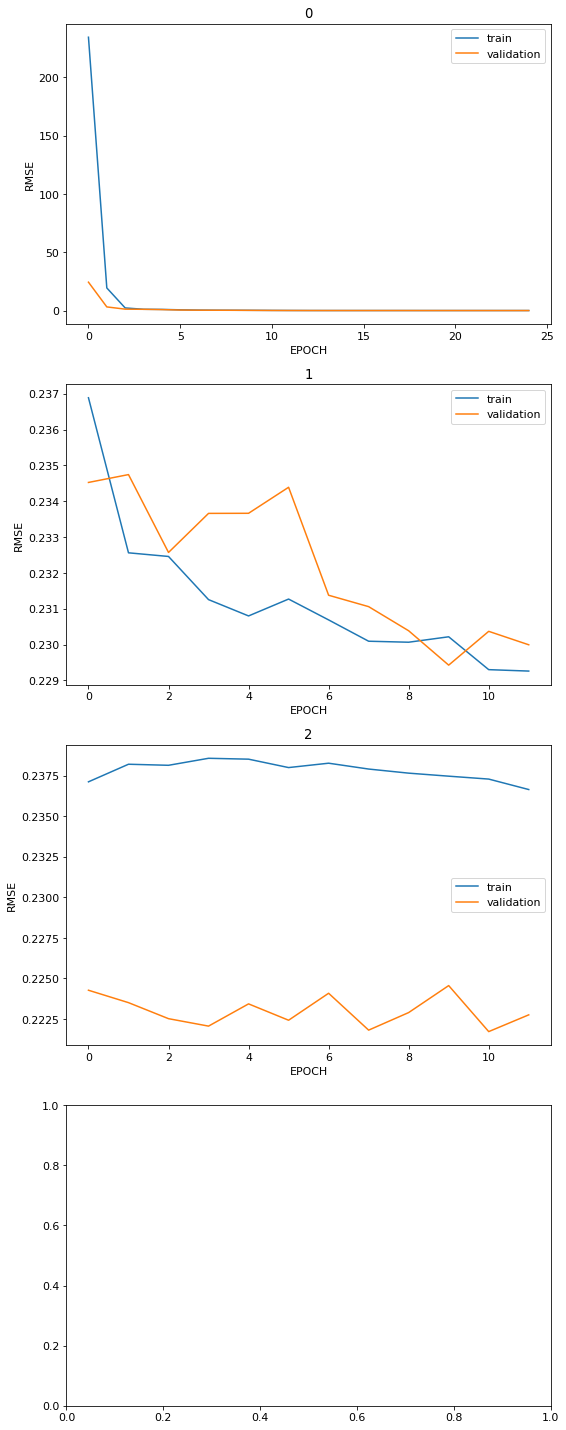

In [7]:
#%%capture
import importlib
#reload python import so we don't have to start and restart kernel
importlib.reload(NCF_feat)

hyperparams = {'batch_size': 64, 'epochs': 1, 'layers': '[64,32,16,8]', \
                   'learner': 'adam', 'lr': 0.001, 'mf_pretrain': '', 'mlp_pretrain': '', \
                   'num_factors': 16, 'num_neg': 4, 'out': 1, 'path': 'Data/', \
                   'reg_layers': '[0.01,0,0,0.01]', 'reg_mf': 0.01, 'verbose': 1, 'warm_start':False}
model  = NCF_feat.Neural_Collaborative_Filtering_Features(hyperparams,'name', 'feature_based') # can be feature based
        # it needs to be non bc models does feature transform
epochs = 600
batch_size = 64
plot_counter = 0
fig, axs = plt.subplots(4, figsize=(8,20))
for k in dataset.datasets:
    print(k)
    train_rmses = []
    test_rmses = []

    for epoch in range(epochs): 
        if epoch % 10 == 0:
            print("epoch : " , epoch)
        t1 = time()
        # Generate training instances
        train_x = dataset.data['train']['x'][k][:30000]
        train_y = dataset.data['train']['y'][k][:30000]
        test_x = dataset.data['test']['x'][k][:10000]
        test_y = dataset.data['test']['y'][k][:10000]
#        overlap = 0
#         for y in test_y:
#             if y in train_y:
#                 overlap += 1
#         print(overlap, "Overlap")
    
        train_hist = model.model.fit({'user_inputs':np.array(train_x[:,:10]), 'item_inputs':np.array(train_x[:,10:])} \
                                     , np.array(train_y), batch_size=batch_size, epochs=1, verbose=0, shuffle=False)
        test_hist = model.model.evaluate({'user_inputs':np.array(test_x[:,:10]), 'item_inputs':np.array(test_x[:,10:])}, np.array(test_y),
                            batch_size=batch_size, verbose=0,return_dict=True)
        t2 = time()
        #print("train: ",train_hist.history['root_mean_squared_error'], "test: ", test_hist['root_mean_squared_error'])

        train_rmses.append(train_hist.history['root_mean_squared_error'])
        test_rmses.append(test_hist['root_mean_squared_error'])
        if epoch > 10 and np.max(train_rmses[epoch-10:epoch] - np.min(train_rmses[epoch-10:epoch])) < .008:
            print("BREAK")
            break
    axs[plot_counter].plot(train_rmses)
    axs[plot_counter].plot(test_rmses)
    axs[plot_counter].set_title(k)
    axs[plot_counter].legend(['train', 'validation'])
    axs[plot_counter].set_ylabel('RMSE')
    axs[plot_counter].set_xlabel('EPOCH')
    plot_counter += 1
    print('min train err: ',min(train_rmses), "min test err: ", min(test_rmses) )